In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline

In [2]:
df = pd.read_csv("final_data.csv")

In [3]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [5]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [6]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [7]:
df["position"].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [8]:
df["current_value"]

0        15000000
1         1500000
2          600000
3        50000000
4        40000000
           ...   
10749       75000
10750      300000
10751       50000
10752       50000
10753       25000
Name: current_value, Length: 10754, dtype: int64

In [9]:
df["highest_value"]

0        70000000
1        22000000
2         6000000
3        50000000
4        80000000
           ...   
10749       75000
10750      300000
10751       50000
10752       50000
10753       25000
Name: highest_value, Length: 10754, dtype: int64

### Top 10 Players by Market Value

In [10]:
value_df = df[["team","name","current_value"]]
value_df_ = value_df.sort_values(by = "current_value", ascending = False)

top_10 = value_df_.head(10)
top_10

,team,name,current_value
2644,Paris Saint-Germain,Kylian Mbappé,180000000
453,Manchester City,Erling Haaland,170000000
1521,Real Madrid,Vinicius Junior,150000000
960,Borussia Dortmund,Jude Bellingham,120000000
450,Manchester City,Phil Foden,110000000
474,Arsenal FC,Bukayo Saka,110000000
1017,Bayern Munich,Jamal Musiala,110000000
2023,SSC Napoli,Victor Osimhen,100000000
1540,FC Barcelona,Pedri,100000000
1516,Real Madrid,Federico Valverde,100000000


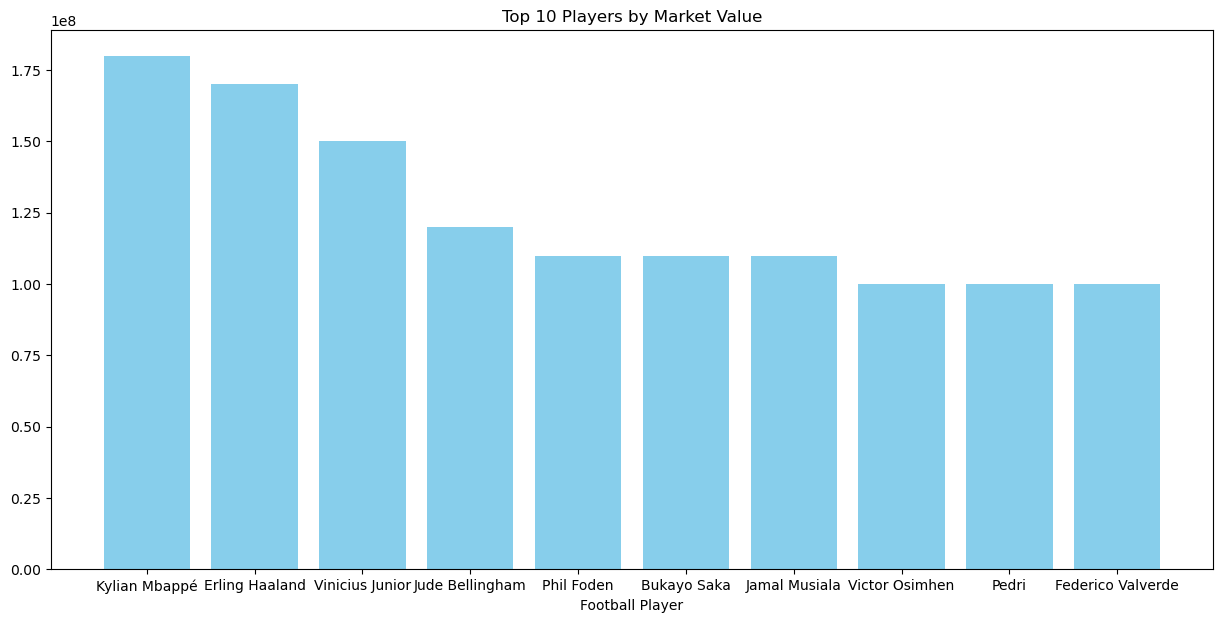

In [72]:
plt.figure(figsize=(15, 7))
plt.bar(top_10['name'], top_10['current_value'], color='skyblue')
plt.xlabel('Football Player')
plt.title('Top 10 Players by Market Value')
plt.show()

In [12]:
def map_position(pos):
    if "Goalkeeper" in pos:
        return "GK"
    elif "Defender" in pos:
        return "DEF"
    elif "midfield" in pos:
        return "MID"
    elif "Attack" in pos:
        return "FWD"
    else:
        return "Other"

In [13]:
df["pos_group"] = df["position"].apply(map_position)

In [14]:
df = pd.get_dummies(df, columns=["pos_group"],drop_first=True)

In [15]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger', 'pos_group_FWD', 'pos_group_GK',
       'pos_group_MID'],
      dtype='object')

In [16]:
df.drop(["player","name","position"], axis = 1, inplace=True)

In [17]:
X = df.drop(columns=["current_value","position_encoded","highest_value"]) 
y = df["current_value"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [19]:
team_means = y_train.groupby(X_train['team']).mean()

In [20]:
global_mean = y_train.mean()
X_train['team_encoded'] = X_train['team'].map(team_means).fillna(global_mean)
X_test['team_encoded'] = X_test['team'].map(team_means).fillna(global_mean)

In [21]:
X_train = X_train.drop(columns=['team'])
X_test = X_test.drop(columns=['team'])

In [22]:
scaler = StandardScaler()

### Linear Regression

In [51]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
linear = LinearRegression()

In [53]:
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [54]:
y_pred_test = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred_test)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", score)

MAE:  3167926.807887757
MSE:  36418371253734.25
RMSE:  6034763.562372121
R2:  0.5132816537382753


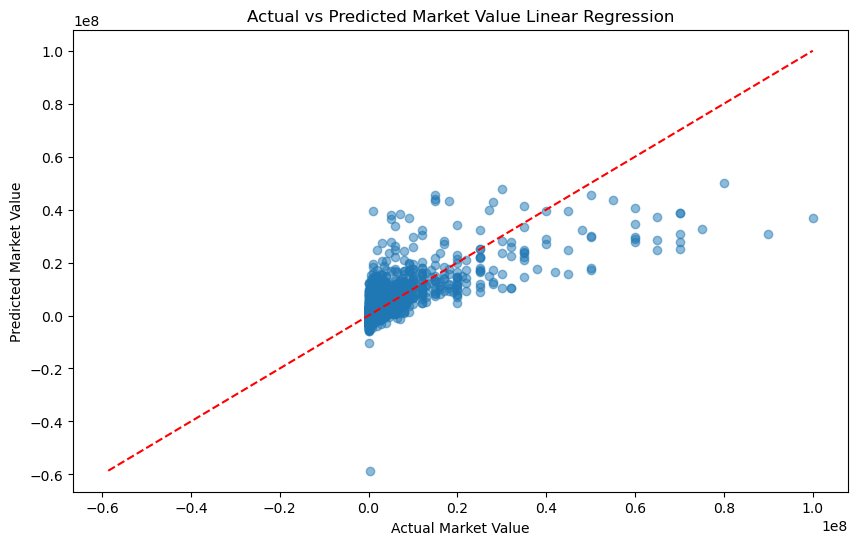

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value (Linear Regression)")
plt.show()

### Lasso Cross-Validation

In [57]:
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)
y_pred_test = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred_test)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", score)

MAE:  3158073.054066846
MSE:  36329566806391.82
RMSE:  6027401.331120388
R2:  0.5144684930246908


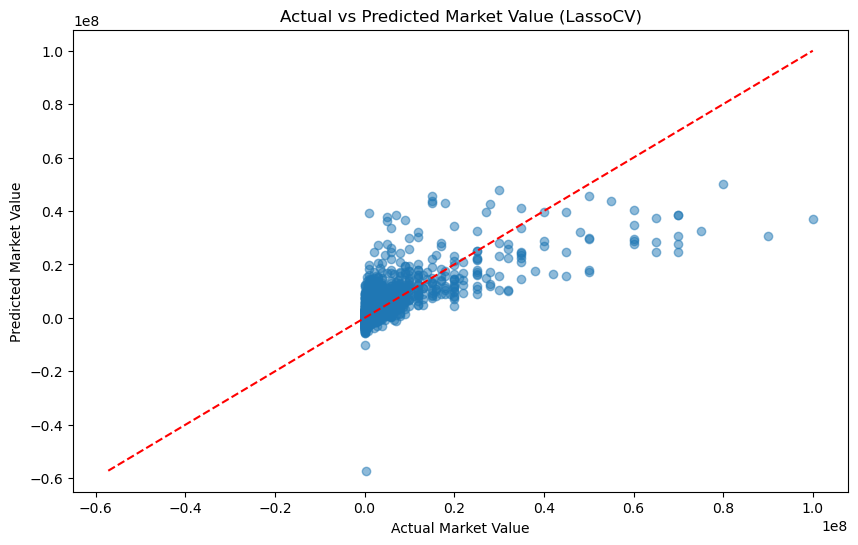

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value (LassoCV)")
plt.show()

### Ridge Cross-Validation

In [77]:
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)
y_pred_test = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred_test)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", score)

MAE:  3164244.713051148
MSE:  36405549971496.23
RMSE:  6033701.183477371
R2:  0.513453005533345


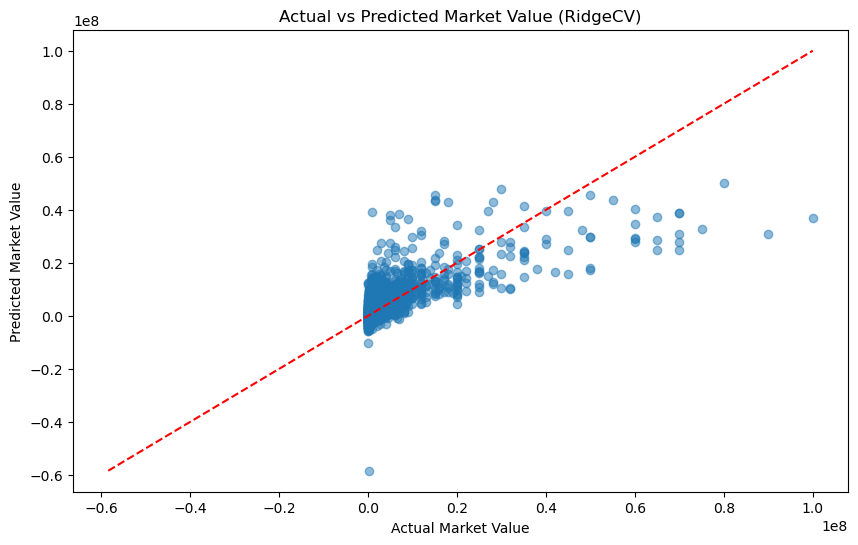

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value (RidgeCV)")
plt.savefig("figures/actual_vs_predicted_ridge.png", dpi=300, bbox_inches="tight")
plt.show()

### ElasticNet Cross-Validation

In [65]:
elasticnetcv = ElasticNetCV(cv = 5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred_test = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred_test)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", score)

MAE:  4294244.530558031
MSE:  74799146901538.86
RMSE:  8648650.004569434
R2:  0.0003364832530281525


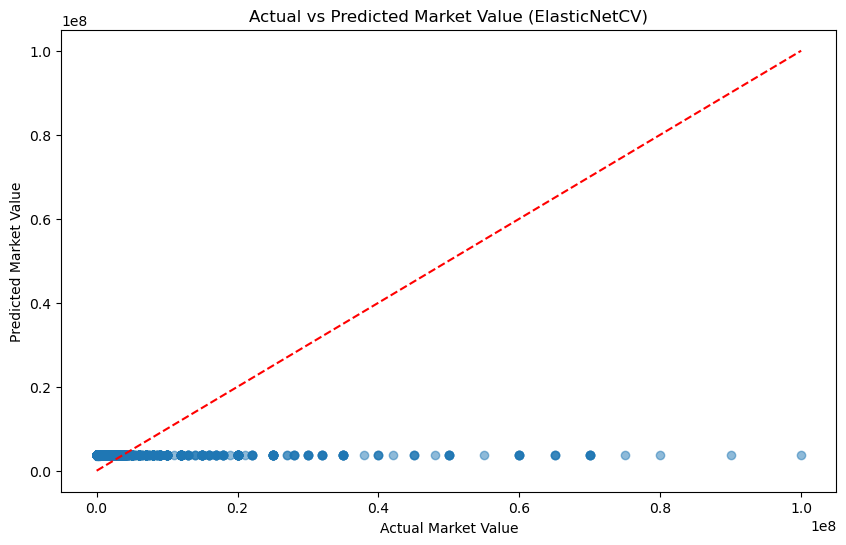

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value (ElasticNetCV)")
plt.show()

### Polynomial Regression

In [67]:
poly = PolynomialFeatures(degree = 2, include_bias= True)

In [68]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [69]:
linear.fit(X_train_poly, y_train)

LinearRegression()

In [70]:
y_pred_poly = linear.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", score)

MAE:  2300000.3964879173
MSE:  30576790169989.883
RMSE:  5529628.393480875
R2:  0.0003364832530281525


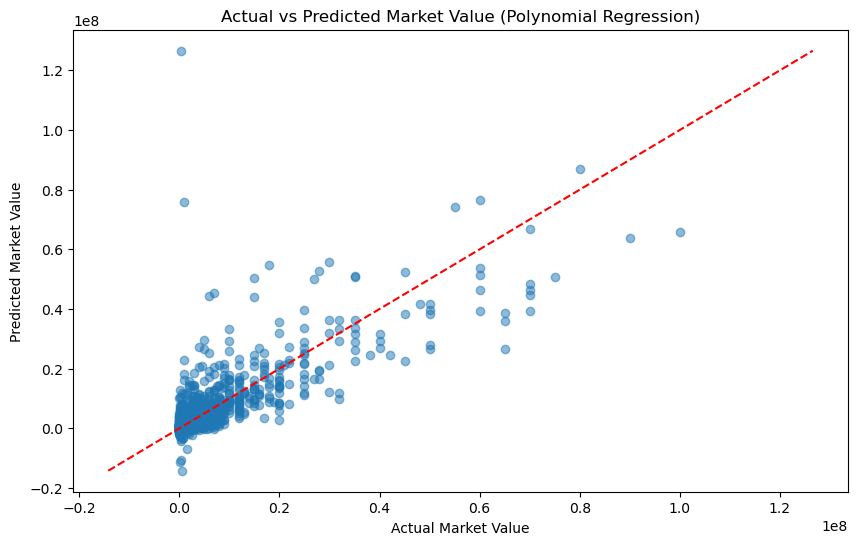

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
min_val = min(y_test.min(), y_pred_poly.min())
max_val = max(y_test.max(), y_pred_poly.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value (Polynomial Regression)")
plt.show()